# Using Modules in Python
In Python, modules are files containing Python code that can be imported and used in your Python scripts. Modules provide a way to organize and reuse code, making it easier to build complex programs. Python offers a wide range of built-in modules, as well as third-party modules that can be installed using package managers like pip. In this section, we'll explore how to use modules in Python for bioinformatics tasks.

We've already used some modules through the week, most notably matplotlib for graphing so hopefully it makes a bit of sense!

##Importing Modules
To use a module in Python, you need to import it into your script. There are a few ways to import modules. We'll look at ```math``` for simplicity, then do some bioinformatics afterwards.

You can import the entire module and access its functions, classes, and variables using the module name as a prefix. 

In [ ]:
import math               ## It is frustrating writing math instead of maths, but we can't have everything

radius = 5
area = math.pi * math.pow(radius, 2)      ## pi and pow are specifically from the math module
print("The area of a circle with radius {} is: {}".format(radius, area))

However that can be dangerous as modules can be really large, and also contain functions that you're unaware of and can clash with your own code. You're safer either importing just the functions you want, or use your own alias to avoid clashes if you need the whole module for certain.

In [ ]:
from math import sqrt, factorial

number = 16
square_root = sqrt(number)
factorial_result = factorial(number)
print("The square root of {} is: {}".format(number, square_root))
print("The factorial of {} is: {}".format(number, factorial_result))

Using an alias also just saves on loads of typing! Imagine having to write the first one instead of the second (although as we have used a function here, it is more simple):

In [ ]:
import matplotlib.pyplot

def plot_data(x, y):
    matplotlib.pyplot.plot(x, y)
    matplotlib.pyplot.xlabel("How many times you've typed it out")
    matplotlib.pyplot.ylabel("Feels")
    matplotlib.pyplot.show()

x = [1,2,3,6]
y = ["It's fine", "a bit annoying", "I hate this", "ok I'll use aliases"]

plot_data(x, y)

In [ ]:
import matplotlib.pyplot as plt

def plot_data(x, y):
    plt.plot(x, y)
    plt.xlabel('Feels')
    plt.ylabel("How many times you've done it")
    plt.show()

x = [1,2,3,6]
y = ["It's fine", "It's fine","It's fine","It's fine"]

plot_data(x, y)

# Biopython
Biopython is a widely-used Python library for bioinformatics that offers a huge range of tools and modules. (Honestly, it has everything in there). Think back to the work we did loading, parsing, and interpretting simple fasta files. It has built in class objects that know what different formats should look like which gives you easy access, but also has lots of common and complex functions to ease your coding requirements.

Here's an example of using Biopython's Seq module to perform a simple sequence analysis:

## Sequence Manipulation

In [ ]:
from Bio.Seq import Seq

# Create a DNA sequence
sequence = Seq("ATGCAGTACGTC")

print(sequence)
print(type(sequence))


Oh no! The module isn't installed! 99.9% of the time it's really easy to install a python module using pip (python installation program). On your own computer or serer you'd type this command without the ```!``` but that is required on collab/Jupyter to tell it that you're using a bash command, not python.

Once it's intalled try and run the command above again.

In [ ]:
!pip install biopython

One thing to note here. While the ```print(sequence)``` command outputs the sequence, we are not actually looking at a string. The ```type()``` shows us that it is an class now, although it has been defined to output the sequence if asked to print.

We'll look at that that means in the Object Oriented Programming session. First lets look at using the library.

The Biopython Seq module has various built in functions for manipulating sequences:

In [ ]:
# Print the reverse complement
reverse_complement = sequence.reverse_complement()
print("Reverse complement:", reverse_complement)

Compare what we've just done back to methods like ```.count()```. The ```.reverse_complement()``` method works in the same way, by having functions and definitions hidden in the background. It's just that this new method came from inside a 3rd party library rather than built into python itself.

Why build our own complement and reverse_complement functions, when a library can do it for us??

What functions are included in our module? Often it's easier to use Google or the official documentation, but you can also use the ```dir()``` function to print them:

In [ ]:
dir(Seq)

---

## Bioinformatic file formats with Biopython

When we have worked with files before it has been using them in the context of plain text and we format the input/output in our own way. Biopython can help us make this easier because it already understands what different bioinformatic formats should look like. 

Here let's read in a fasta file containing a range of CO1 sequences from fungi. Note how we now automatically have (at least) two elements: the description, and the sequence.

This object also has a method in it named ```.translate()``` which can be used to convert a DNA sequence to amino acid. You can even specify the codon coding table!

In [ ]:
from Bio import SeqIO, Seq

for seq_record in SeqIO.parse("/content/co1_sequences.fasta", "fasta"):
    # Print the header, sequence, and length of each record
    print(seq_record.description)
    print(seq_record.seq)
    print("Sequence length:", len(seq_record))

    # Use the .translate method to get the amino acid sequence (using mitochondira coding table)
    new_aa = seq_record.seq.translate(table=2)
    print(new_aa)
    print("--")
    

### Exercise - Importing with SeqIO
We need to keep the amino acid sequences that begin with Phenylalenine (F) for our later analysis!

Objective - Based on your confidence, either:
- Create an empty list, add each sequence to it and output the relevant sequences
- Create a dictionary where the ID is the key and the aa sequence is the value (the ID is the header part before the first whitespace, and can be accessed with seq_record.id). 

Extension: Output the relevant sequences to a file named Phenylalenine_aas.fasta

Note: Lets pretend that we want the rest of the data later in our code, so complete the read data loop first, and then do the filtering in a second loop.

In [ ]:
## Write here

---

## Embl / GenBank formats

Lets look at a different type of bioinformatic data type: an EMBL file (It's similar to a GenBank file format if you have seen that before, just European!). Open the .embl text file on your own computer and explore what data is in there before doing the next step. Quite a lot right?! 

Reading the data with SeqIO means that it will take the plain text file and assign the data to known variable names and methods.

We can loop through it as we did above (although this file has just one record in it), or alternatively we can use the "iterator" format. This means having your code only move on through the loop when you explicitly use ```next()```. Not as usefull most of the time, but an alternative method. 

In [ ]:
from Bio import SeqIO

# Note the scond parameter is the file format
record_iter = SeqIO.parse("/content/am181037.embl", "embl")

first_record = next(record_iter)
print(first_record)

That's just the plain text that you get if you open it usually and also hides the list of features. Let's do something computational. 

First lets look at some of the data that is in our new object:

In [ ]:
## Access annotations 
print(first_record.annotations["organism"])
print(first_record.annotations["taxonomy"])

In [ ]:
# Features is the term for all genes, coding sequences trna's sequence regions
for feature in first_record.features:
  print("Type is:", feature.type, "\tQualifiers are:", feature.qualifiers)

The big question now is what to do with all this information!

### Exercise: data filter

Take this starter code and complete it to output just the sequence between the start and end of each gene. Make sure to think about the ```feature.type```, ```feature.qualifiers```, and how to slice a string!

In [ ]:
from Bio import SeqIO

# Read the data in
record_iter = SeqIO.parse("/content/am181037.embl", "embl")
first_record = next(record_iter)

gene_seq_dict = {}

for feature in first_record.features:
    # These aare built in keywords for the objects
    start = feature.location.start
    end = feature.location.end
    print(start, ":",  end)
    # Populate the dictionary here


# Itterate through the dictionary, outputing the relevant data
for key, value in gene_seq_dict.items():
  print(">" + key)
  print(value)

---

## Writing to defined file formats

We can also use it to write out our sequences, saving them to a file in the correct format, rather than defining it ourselves. That'll save lots of effort!

Lets output our new extracted sequences with a new header into a new file by first putting them into a list, and then saving that.

For a fasta file it requires the format: ```seqence | id | description```

In [20]:
from Bio.SeqRecord import SeqRecord

data_to_write = []

# Using the dictionary from the last exercise
for id, cut_seq in gene_seq_dict.items():
  record = SeqRecord(cut_seq, id)
  data_to_write.append(record)

with open("my_extracted_MT_seqs.fna", 'w') as outputFile:
  SeqIO.write(data_to_write, outputFile, "fasta")

---

Okay. That was a lot! It can get quite complex when dealing with complex third party modules as we don't know all of their logic when creating functions, and it can become really deep with heirarchies of data. Lets keep it simple now and look at a few other cool features of biopython.

## Sequence Alignment

Biopython provides functionality for sequence alignment, allowing you to perform pairwise and multiple sequence alignments. The Bio.Align module offers algorithms such as Needleman-Wunsch and Smith-Waterman for global and local alignments. It also supports accessing alignment scores, sequences, and alignment visualization.

In [ ]:
from Bio import pairwise2
from Bio.Seq import Seq

# Define two DNA sequences - Note that this is just a very simplified version of the sequence file input from above
seq1 = Seq("TATGCTGTACGTC")
seq2 = Seq("ATGCTTACGTCAG")

# Perform pairwise alignment
alignments = pairwise2.align.globalxx(seq1, seq2)
first_alignment = alignments[0]

print("Alignment score:", first_alignment.score)
print("Sequence 1:", first_alignment.seqA)
print("Sequence 2:", first_alignment.seqB)

There we just got a lot of variables out including a score and the aligned sequences. Where did they come from? Print the alignment object and see what's in there:

In [ ]:
print(alignments)

It actually has more data in that object than we just saw. This is a simple object but they can grow to contain a huge amount of parameters and variables.

## Pyhlogenetics

Lets look at a phylogenetic example and draw a tree:

In [ ]:
from Bio import Phylo

# Read a Newick tree file
tree = Phylo.read("/content/primates.nwk", "newick")

# Print tree
Phylo.draw_ascii(tree)

Really, I like this module just because it's cool to see a tree represented so simply, but also shows how simple it is to handle data if there is a module that already understands the format.

But be sure to note, the format of this data object is very different to the sequence object from the last example.

In [ ]:
print(tree)

Before we move on lets draw it with matplotlib and also use the ```.common_ancestor()``` function that comes with the phylo module.

In [ ]:
from Bio import Phylo

# Read a Newick tree file
tree = Phylo.read("/content/primates.nwk", "newick")
tree = tree.as_phyloxml()

# Set labeled nodes
mcra = tree.common_ancestor({"name": "Human"}, {"name": "Gorilla"})
mcra.color = "red"

Phylo.draw(tree)

Honestly, I just think it's neat!

# Pandas, Numpy & SciPy

These are three libraries that go hand-in-hand (in-hand) together for lots of approaches, particularly big numerical data and statistical methods. With the three of them you can likely achive anything that would be typically associated with R, and means it can be incorporated into the rest of your python code workflow. 

We could spend days on just using these two packages, so lets have a brief overview to form a basis. 

### Pandas

Pandas provides powerful data structures and data analysis tools, making it easier to work with structured and tabular data. Pandas is widely used in bioinformatics for tasks such as data cleaning, preprocessing, transformation, and analysis.

If you have ever used dataframes in R, that is what Pandas is allowing you to do in Python. It has some syntax styles that I don't find very intuitive, but I don't like R and that is it's style so if you have that experience you'll likely feel at home!

Main reasons for using Pandas: dataframe objects and features like remove NAs, time-series, simple filtering etc.

Lets create a simple Pandas dataframe. Note when printing how it is structured with row and header characteristics

In [ ]:
import pandas as pd

# Inputted data as dictionary with key to data list
genome_data = {
    "Gene": ["GeneA", "GeneB", "GeneC", "GeneD", "GeneE"],
    "Chromosome": [1, 2, 3, 2, 1],
    "Start": [100, 200, 150, 300, 250],
    "End": [500, 400, 600, 450, 350],
    "Strand": ["+", "-", "+", "-", "+"],
    "log2FC" : [2.1, 0.48, -3.6, 4.7, 0.3],
    "Function": ["Enzyme", "Transporter", "Receptor", "Structural", "Regulator"]
}

# Create DataFrame
df = pd.DataFrame(genome_data)

print(df)

    Gene  Chromosome  Start  End Strand  log2FC     Function
0  GeneA           1    100  500      +    2.10       Enzyme
1  GeneB           2    200  400      -    0.48  Transporter
2  GeneC           3    150  600      +   -3.60     Receptor
3  GeneD           2    300  450      -    4.70   Structural
4  GeneE           1    250  350      +    0.30    Regulator


We can filter the data in methods that would be very very dificult to do with standard python. For example to select just specific columns would usually require loops, indexes and appending.

Here we can filter and select in one command:

In [ ]:
# Select specific columns
selected_columns = df[["Gene", "Start", "End"]]
print(selected_columns)
print("---")

# Filter rows based on a condition
filtered_rows = df[df["log2FC"] > 0]
print(filtered_rows)

    Gene  Start  End
0  GeneA    100  500
1  GeneB    200  400
2  GeneC    150  600
3  GeneD    300  450
4  GeneE    250  350
---
    Gene  Chromosome  Start  End Strand  log2FC     Function
0  GeneA           1    100  500      +    2.10       Enzyme
1  GeneB           2    200  400      -    0.48  Transporter
3  GeneD           2    300  450      -    4.70   Structural
4  GeneE           1    250  350      +    0.30    Regulator


Other functions such as sorting, grouping, and applying functions can be usefully applied

In [ ]:
# Sort DataFrame by a column
sorted_df = df.sort_values("Chromosome")
print(sorted_df)

# Group DataFrame by a column and calculate summary statistics
grouped_df = df.groupby("Chromosome")["log2FC"].mean()
print(grouped_df)

# Apply a function to a column
df["Gene Length"] = df["End"] - df["Start"] + 1
print(df)

    Gene  Chromosome  Start  End Strand  log2FC     Function
0  GeneA           1    100  500      +    2.10       Enzyme
4  GeneE           1    250  350      +    0.30    Regulator
1  GeneB           2    200  400      -    0.48  Transporter
3  GeneD           2    300  450      -    4.70   Structural
2  GeneC           3    150  600      +   -3.60     Receptor
Chromosome
1    1.20
2    2.59
3   -3.60
Name: log2FC, dtype: float64
    Gene  Chromosome  Start  End Strand  log2FC     Function  Gene Length
0  GeneA           1    100  500      +    2.10       Enzyme          401
1  GeneB           2    200  400      -    0.48  Transporter          201
2  GeneC           3    150  600      +   -3.60     Receptor          451
3  GeneD           2    300  450      -    4.70   Structural          151
4  GeneE           1    250  350      +    0.30    Regulator          101


Pandas also has it's own method to take a pandas dataframe and read/write to/from a csv file:

In [ ]:
# Save DataFrame to a CSV file
df.to_csv("genome_data.csv", index=False)

# Read in a different one 
new_df = pd.read_csv("/content/genome_data.csv")

print(new_df)

    Gene  Chromosome  Start  End Strand  log2FC     Function  Gene Length
0  GeneA           1    100  500      +    2.10       Enzyme          401
1  GeneB           2    200  400      -    0.48  Transporter          201
2  GeneC           3    150  600      +   -3.60     Receptor          451
3  GeneD           2    300  450      -    4.70   Structural          151
4  GeneE           1    250  350      +    0.30    Regulator          101


---

### NumPy & sciPy

Now we've got some data, lets look at what we can do with it.

Numpy (Numerical Python) is a fundamental library for scientific computing, including applications in bioinformatics. It provides powerful data structures, mathematical functions, and tools for efficient numerical operations. 

How much you will find yourself engaging with it will depend on how statistical your analysis is and the level of computation. For example when performing just sequence manipulation it doesn't have much alignment, but then with large arrays Numpy becomes essential, and we have used it a few times this week for specialised functions. 

My main reason for using Numpy: Efficincy with big data, and array methods that are hard to do with loops.

The data we have here is quite small and one dimensional so really we're limited to basic statistics and transformations such as mean or normalising. Lets retrieve some of the ChipSeq binding data from the Day2 Project:

In [ ]:
x_coords = [-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033, 0.10101010101010033, 0.30303030303030276, 0.5050505050505052, 0.7070707070707076, 0.9090909090909083, 1.1111111111111107, 1.3131313131313131, 1.5151515151515156, 1.7171717171717162, 1.9191919191919187, 2.121212121212121, 2.3232323232323235, 2.525252525252524, 2.7272727272727266, 2.929292929292929, 3.1313131313131315, 3.333333333333334, 3.5353535353535346, 3.737373737373737, 3.9393939393939394, 4.141414141414142, 4.3434343434343425, 4.545454545454545, 4.747474747474747, 4.94949494949495, 5.1515151515151505, 5.353535353535353, 5.555555555555555, 5.757575757575758, 5.9595959595959584, 6.161616161616163, 6.363636363636363, 6.565656565656564, 6.767676767676768, 6.969696969696969, 7.171717171717173, 7.373737373737374, 7.575757575757574, 7.777777777777779, 7.979797979797979, 8.18181818181818, 8.383838383838384, 8.585858585858585, 8.787878787878789, 8.98989898989899, 9.19191919191919, 9.393939393939394, 9.595959595959595, 9.7979797979798, 10.0]
y_abun_WT01 = [0.024835707650561638, -0.006913215058559218, 0.032384426905034715, 0.07615149282040178, -0.01170766873616412, -0.011706847847445299, 0.07896064077543714, 0.038371736457964746, -0.023473719295299168, 0.027128002185605894, -0.023170884614253002, -0.023286487572677417, 0.012098113986081483, -0.09566401072456185, -0.08624588626964101, -0.02811435820365532, -0.050641496263793495, 0.015712554358744923, -0.04540063756420216, -0.07061354560194667, 0.07328699567395373, -0.01127665386740717, 0.0034075650039152067, -0.07116078797889451, -0.02703823131675952, 0.005956169757762421, -0.05665744608770373, 0.020648726819942, -0.02629420375112613, -0.007388769818949274, -0.01678569132543404, 0.11621157477979752, 0.03952029530634777, 0.012842982168735508, 0.14431058985850037, 0.09446154081516586, 0.2354250318893722, 0.2145018619332807, 0.35025605036152235, 0.5432032486272783, 0.6923578370875558, 0.7818069943713853, 0.8699536397806791, 0.9371015602232684, 0.9199200738080698, 0.9598840840957631, 0.9349716210831763, 0.9375730740190088, 0.8015438959178701, 0.5794310807705013, 0.5616719344331439, 0.4086124127792228, 0.28835206243915956, 0.26350731584845694, 0.21320122491206775, 0.15426515114584213, 0.026926093674337424, 0.026838307682823276, 0.04149746765721217, 0.0628876907050029, -0.016292882388164693, -0.005284850857738507, -0.0533149370502325, -0.05884812424060217, 0.041070297572602533, 0.06800869291910734, -0.0035168577317869648, 0.0502107959917431, 0.01809518653236153, -0.03225095126592809, 0.018071599555516713, 0.07690245920637434, -0.0017910919291937704, 0.07823224991410932, -0.130987234610055, 0.04109513128474359, 0.004352355127160706, -0.014950367057674796, 0.004588038948116272, -0.09937844569968746, -0.010983594384584544, 0.017855628577268426, 0.07389470223744793, -0.025913510913603298, -0.04042468014464325, -0.025087852179223668, 0.04577010588510431, 0.016437555482984333, -0.026488010188351924, 0.02566337165566781, 0.00485387746740202, 0.04843224952664446, -0.03510265469386762, -0.016383107329888413, -0.019605407656607884, -0.07317574740660593, 0.014806013853228803, 0.013052763608994468, 0.0002556728321230445, -0.011729356668757346]
y_abun_WT02 = [0.014901424590336979, -0.004147929035135539, 0.019430656143020773, 0.04569089569224076, -0.007024601241700079, -0.007024108708475416, 0.047376384465221744, 0.02302304187458726, -0.014084231578048556, 0.01627680130757898, -0.013902530784373625, -0.013971892607106386, 0.007258868146987911, -0.057398407339699434, -0.05174753497522512, -0.016868625876463633, -0.03038493360664058, 0.009427419992287644, -0.027240722206711115, -0.042369110809049856, 0.0439694639370708, -0.006773285873290009, 0.0020258570365673744, -0.042742409304185325, -0.01633136575154294, 0.0033280336334520384, -0.03452875866079554, 0.011273906522279675, -0.018011107393593326, -0.008729820356738084, -0.017998667481826183, 0.055694542318820046, -0.00011387360891567717, -0.0310869480481084, 0.026045973418275893, -0.03383059408572369, 0.011740460972493743, -0.04849489248420628, -0.02125909275327216, 0.03811911697619894, 0.07575193062176126, 0.09075344285372233, 0.12781121025255568, 0.1842261677099998, 0.22876557309075582, 0.34895404216232073, 0.468808480921967, 0.6351810663517446, 0.7346960305695039, 0.7818725098936687, 0.9332114460090799, 0.9692359415796828, 0.9796795862715181, 0.9971393345354964, 0.9506576351447806, 0.8576074515701989, 0.6933222580747777, 0.588065130502523, 0.4866924511398444, 0.3945603240138099, 0.2543235347994995, 0.18417260488940634, 0.09543883393805441, 0.04782588848552325, 0.07667717840984772, 0.0720571650724165, 0.01590270977237124, 0.040090844849451926, 0.016147777645390965, -0.016654164516416003, 0.012162099274896452, 0.046760971335058306, -0.0007953770181783749, 0.04706021281001754, -0.07854212837409431, 0.024677104786861834, 0.002619080446035456, -0.008967402056981016, 0.002753817770521991, -0.059626730576543864, -0.0065900470921374105, 0.01071341134277006, 0.04433683159115233, -0.015548103599463983, -0.02425480727233045, -0.01505271109157115, 0.027462063586037765, 0.009862533303225335, -0.015892806109859294, 0.015398022994110555, 0.0029123264805946975, 0.029059349716018534, -0.02106159281631422, -0.009829864397931832, -0.011763244593964505, -0.04390544844396351, 0.008883608311937288, 0.00783165816539668, 0.00015340369927382684, -0.007037614001254407]
y_abun_WT03 = [0.039737132240898615, -0.01106114409369477, 0.05181508304805541, 0.12184238851264213, -0.018732269977866367, -0.01873095655593172, 0.12633702524060528, 0.06139477833230135, -0.03755795087447194, 0.04340480348834738, -0.03707341541859715, -0.037258380258876025, 0.01935698183257705, -0.15306241915939167, -0.13799342507317053, -0.04498299691608085, -0.08102647114686906, 0.025139847060731742, -0.07264173619041409, -0.1129837237275112, 0.11725355816013569, -0.018057500930304223, 0.00541453495449516, -0.11394841214650785, -0.04347331992962722, 0.009056235325539558, -0.09166616205823129, 0.03095485283779183, -0.04617387548105694, -0.01957244528729657, -0.04089481347989692, 0.16156107720897245, 0.022648696868103915, -0.044215395442308784, 0.1318425496642724, 0.005960873398863781, 0.17281976033741417, 0.06899421347121576, 0.20719419642475762, 0.4335287176285464, 0.593645892461611, 0.6703608726927143, 0.7651062421145435, 0.852557831153455, 0.8344755555365936, 0.9364797187514263, 0.9588402804236036, 1.042004627841168, 0.9113204377452219, 0.6422145493857878, 0.6922971214311878, 0.5134481276168771, 0.37258706791129026, 0.3701534524100319, 0.3146011065930695, 0.23553108207527645, 0.04010517111227663, 0.04382868252193331, 0.06858553454222055, 0.10284136039381589, -0.024306502687348047, -0.007235088827513868, -0.08453545978145696, -0.09370892803434677, 0.06595705274751527, 0.10893969728353946, -0.005565753406745411, 0.08036555093020434, 0.02896472155735991, -0.05159632260761176, 0.028916634888009073, 0.12304472579518778, -0.002865459020635185, 0.12517170015121942, -0.20957954197877268, 0.06575222069836202, 0.00696377145010654, -0.02392058634389601, 0.007340862582332036, -0.15900551304837576, -0.017573750997067664, 0.028569005728126023, 0.11823152358097756, -0.041461617461525324, -0.06467948823137717, -0.04014056348674705, 0.07323216941616904, 0.02630008877277534, -0.042380816301363, 0.04106139464906851, 0.007766203947843234, 0.07749159924263115, -0.05616424751018819, -0.026212971727821457, -0.03136865225057261, -0.11708119585056949, 0.023689622165166086, 0.020884421774391145, 0.0004090765313968712, -0.018766970670011755]
y_abun_KO01 = [0.17384995355393143, -0.048392505409914625, 0.22669098833524234, 0.5330604497428089, -0.08195368115316759, -0.08194793493221318, 0.552724485427587, 0.26860215520351804, -0.16431603507723322, 0.18989601525508762, -0.1621961924843618, -0.1630054137495899, 0.08468679504811194, -0.6696480856302293, -0.6037212413795614, -0.19680063523434044, -0.3544908921170483, 0.10998656640834585, -0.3178084264324238, -0.494306295467352, 0.5129770691225439, -0.07902170517028748, 0.023634871640773342, -0.49866186517470984, -0.19053395358381392, 0.038822906398453136, -0.40284775209780593, 0.1314943064209853, -0.21022354147158095, -0.10209281242764283, -0.21059731428026837, 0.6482973645782282, -0.004724028657809091, -0.37019882513246466, 0.2878907192451702, -0.4272952774523904, 0.07310225840051184, -0.6858845427902397, -0.46486511503598005, 0.06890143985983518, 0.25846332765017954, 0.05997897827365577, -0.04047665049117948, -0.10538555202409516, -0.5174805716065833, -0.25193962596696245, -0.1612081253315336, 0.37003194366906955, 0.12036174384821689, -0.6168412334047823, 0.11392930996613561, -0.1337020313871791, -0.23469622582951635, 0.21850636482808838, 0.3692722408881837, 0.34135648726185824, -0.2666643204260036, -0.06259643560293583, 0.18979713326987774, 0.45620436970017514, 0.0034891654472966604, 0.18019634820661914, -0.050138949576201686, 0.02622251444340795, 0.8480988454526164, 1.1603885539960523, 0.7755338603636915, 1.2489106372344883, 1.092674206260864, 0.772373224018147, 1.116539305829484, 1.4810444796005102, 0.8492365177286736, 1.3038934453173585, -0.2797736294838421, 0.8029722928619354, 0.4305711896833641, 0.19358152351836805, 0.2455270846777493, -0.5490433546444966, 0.019800302611125378, 0.1862028446800429, 0.5544684853351174, -0.15968533731961132, -0.270812112179896, -0.1690754674757137, 0.32376678092733485, 0.11673608201956656, -0.18461998462696785, 0.1800072234847474, 0.03413658884552807, 0.33909286729113075, -0.24569145771435863, -0.11467122772437116, -0.13723393409430082, -0.5122288304092815, 0.10364257802429944, 0.09136950378346358, 0.001789759972978397, -0.08210548145132167]
y_abun_KO02 = [0.11424425519258352, -0.03180078926937247, 0.14896836376315928, 0.3502968669738458, -0.053855276186367276, -0.05385150009831153, 0.36321894756670003, 0.176509987705169, -0.10797910876503898, 0.12478881002477192, -0.10658606934686607, -0.10711784332115777, 0.05565132246019474, -0.44005445627125905, -0.3967311014778317, -0.12932613172465818, -0.23295115767352537, 0.07227688651134243, -0.2088455373109533, -0.3248298510761082, 0.3370992177213816, -0.051928545970597144, 0.015531497974152143, -0.32769204654687667, -0.1252079106565795, 0.025512551575425254, -0.2647274741452561, 0.08641351019141408, -0.13813884537735432, -0.06706857031539344, -0.13833998992770558, 0.4261501792206076, -0.0028133185565024617, -0.24262913383928847, 0.19055495583891371, -0.27799932407992817, 0.053513179973444826, -0.44042891726016137, -0.2868963025329583, 0.07749136415002364, 0.22344524662084336, 0.12502709909171644, 0.10468155377490757, 0.12400542859214204, -0.06693882498272968, 0.20498520048337898, 0.37668072673000946, 0.8466055115955278, 0.8034196884831962, 0.42926447882112195, 0.9980282398880389, 0.8922194854964195, 0.8442951862103263, 1.11947459230367, 1.1568575396439709, 1.0438634753934386, 0.52547875343025, 0.5262226553322801, 0.5529451374205572, 0.5896693494382818, 0.15848868723044152, 0.14704080955664292, -0.12582816086315127, -0.19141543633061092, 0.23918234288868734, 0.3433051707865811, 0.0015006854563044715, 0.2407974244278568, 0.0884749826549178, -0.14567811543744086, 0.08444122037657924, 0.35436828462825215, -0.007960584840168683, 0.35998894397281883, -0.6024911491920432, 0.18905760566190663, 0.0200284940936697, -0.06876887215015451, 0.02110597307762245, -0.4571405134967224, -0.0505244246596398, 0.08213592564511936, 0.33991564053945555, -0.11920214725419347, -0.18595352785096797, -0.11540411980847846, 0.2105424871264526, 0.07561275523516223, -0.12184484686326706, 0.11805150961678178, 0.022327836350202773, 0.2227883478225964, -0.1614722115917847, -0.07536229371748547, -0.09018487522039603, -0.3366084380703872, 0.0681076637248525, 0.060042712601374545, 0.0011760950277660048, -0.053955040676283796]
y_abun_KO03 = [0.07450712295168489, -0.0207396451756777, 0.09715328071510387, 0.22845447846120379, -0.035123006208500396, -0.03512054354237708, 0.23688192232610872, 0.11511520937293632, -0.07042115789024281, 0.0813840065378947, -0.06951265392186934, -0.06985946303553853, 0.03629434073490512, -0.2869920366986697, -0.2587376748769549, -0.0843431293861459, -0.15192466805016355, 0.04713709988929108, -0.13620361132818162, -0.21184555520029372, 0.2198473153382331, -0.033866445072980346, 0.010129230703188575, -0.21371222793201852, -0.0816574086787774, 0.016638388456479913, -0.1726490366133454, 0.05635470275185079, -0.09009580348782074, -0.043754062468991516, -0.09025599183440954, 0.27784172767634063, -0.002024583710690088, -0.15865663934338506, 0.12338173681547834, -0.18312654749565332, 0.031329539250713336, -0.29395051858196614, -0.19922790733476364, 0.029529185380373295, 0.11076998699933566, 0.025705242178612482, -0.017347242357691493, -0.045165554335958, -0.22177829854465922, -0.10797663121611796, -0.06909581547348737, 0.15856833458037703, 0.05154274579647009, -0.2644560150387986, 0.04861262318667987, -0.057762252446438754, -0.10153802248763275, 0.09175226860024123, 0.15465228406249357, 0.1396984731143364, -0.12586564669474543, -0.04633896899846369, 0.049793495015707165, 0.1465737873486627, -0.07133535550815014, -0.026688817499903674, -0.16356137652717231, -0.17470828082202491, 0.13084213624384644, 0.21976713430701914, 0.017763982547500338, 0.19849697817375545, 0.13157033866869589, 0.022898285918790756, 0.23199605237922777, 0.4842781405438592, 0.3418271553611368, 0.6910855524080166, 0.18296173959190654, 0.8209873285092932, 0.8244861564623241, 0.8611040885396294, 0.9848068938889389, 0.7010487526052753, 0.9540742353222257, 0.9895894436221768, 1.0738418069231421, 0.6670414010163735, 0.5036306685348108, 0.4280909537795268, 0.5265433008995553, 0.3382614087793784, 0.12646021586914263, 0.21787670751464577, 0.10709691356062848, 0.20364401787077435, -0.06998889686281763, -0.028624782653929738, -0.04736602185931412, -0.21339487273053562, 0.04757100559536211, 0.04071456182072633, 0.0015044589064306777, -0.034852607378369524]
y_WT_list = [y_abun_WT01, y_abun_WT02, y_abun_WT03]
y_KO_list = [y_abun_KO01, y_abun_KO02, y_abun_KO03]

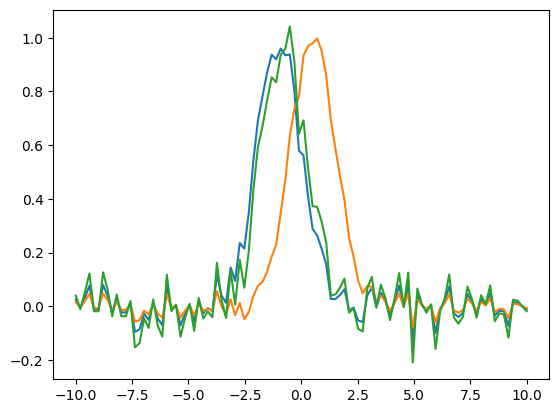

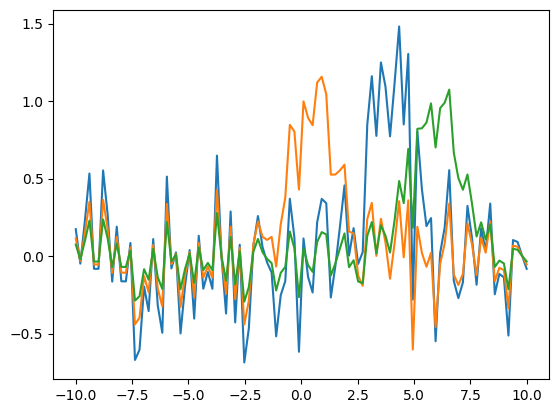

In [ ]:
# Quick reminder of the data
import matplotlib.pyplot as plt

# WT
for sample in y_WT_list:
  plt.plot(x_coords,sample)
plt.show()

# KO
for sample in y_KO_list:
  plt.plot(x_coords,sample)
plt.show()


Lets calculate some base statistics

In [ ]:
import numpy as np

x = np.array([x_coords])
y = np.array([y_abun_WT01])

print("Mean:", np.mean(y))
print("Standard Deviation:", np.std(y))
print("Max value is:", np.max(y))

# Calculate the correlation coefficient between x and y
corr_coef = np.corrcoef(x, y)[0, 1]
print("Correlation Coefficient:", corr_coef)


Mean: 0.1084986456710319
Standard Deviation: 0.30167972779496477
Max value is: 1.0738418069231421
Correlation Coefficient: 0.4431552943096089


More powerfully we can use numpy to apply functions accross arrays. Let's combine all Wild Types and all Knock Outs to have two datasets (is this statistcally a good idea? Probably not, but lets do it anyway!)

In [ ]:
# WT averaging
y1, y2, y3 = y_abun_WT01, y_abun_WT02, y_abun_WT03
WT_mean_values = np.mean([y1, y2, y3], axis=0)

# KO averaging
y1, y2, y3 = y_abun_KO01, y_abun_KO02, y_abun_KO03
KO_mean_values = np.mean([y1, y2, y3], axis=0)

Lets plot them again, and see how much of a mess the KO replicates are!

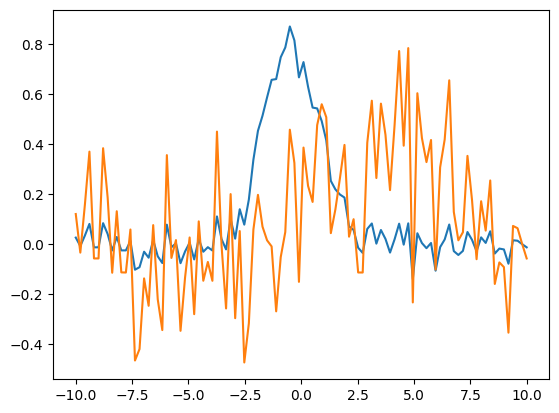

In [ ]:
plt.plot(x_coords,WT_mean_values)
plt.plot(x_coords,KO_mean_values)
plt.show()

Finally lets do some quick statistical testing using sciPy. Although this mock-data is not a good proof of the tests being accurate, but you can see how easy to apply the analysis

In [ ]:
import scipy.stats as stats

# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(WT_mean_values)

# Check if data is normally distributed (using a significance level of 0.05)
if p_value < 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

# Run a Wilcoxon testt
w_statistic, p_value = stats.wilcoxon(WT_mean_values, KO_mean_values)
print("Wilcoxon Signed-Rank Test Result:")
print("W-statistic:", w_statistic)
print("p-value:", p_value)

Data is normally distributed
Wilcoxon Signed-Rank Test Result:
W-statistic: 2410.0
p-value: 0.6925422804041386


There are infinitely more ways to approach handling large data sets like this, as will be examined in the project session.

## Exercise - Array maniulation

If we look at the graphs we can actually see that the KO samples are on a different scale to the WT. Not a good start! 
1 . Using the same collection of 6x datasets, use numpy to normalise each sample, and then do the comparative plots/statistics. Did it help?

Tip: Why not make a function to do this, rather than repeat it 6 times!